In [4]:
import numpy as np
import ChebTools as ct
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import matplotlib as mpl
#mpl.rc('lines', linewidth=2, color='r')
plt.style.available

['seaborn-white',
 'seaborn-darkgrid',
 'seaborn-poster',
 '_classic_test',
 'seaborn-paper',
 'fivethirtyeight',
 'bmh',
 'grayscale',
 'seaborn-bright',
 'classic',
 'dark_background',
 'seaborn-notebook',
 'seaborn-muted',
 'ggplot',
 'seaborn-deep',
 'seaborn-dark',
 'seaborn-pastel',
 'seaborn-dark-palette',
 'seaborn-colorblind',
 'seaborn',
 'seaborn-ticks',
 'seaborn-talk',
 'seaborn-whitegrid']

In [6]:
plt.style.use('seaborn-poster')
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [
       r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
       r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
       r'\usepackage{helvet}',    # set the normal font here
       r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
       r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
] 
mpl.rcParams['axes.titlepad'] = 15

In [7]:
def f(x,y):
    r = np.sqrt(x**2+y**2)
    return np.sin(np.pi*r)
chebf = ct.ChebyshevExpansion2D.factory(10,10,f,-1,1,-1,1)

In [8]:
chebf.z_Clenshaw(1,1)-f(1,1)

3.3306690738754696e-16

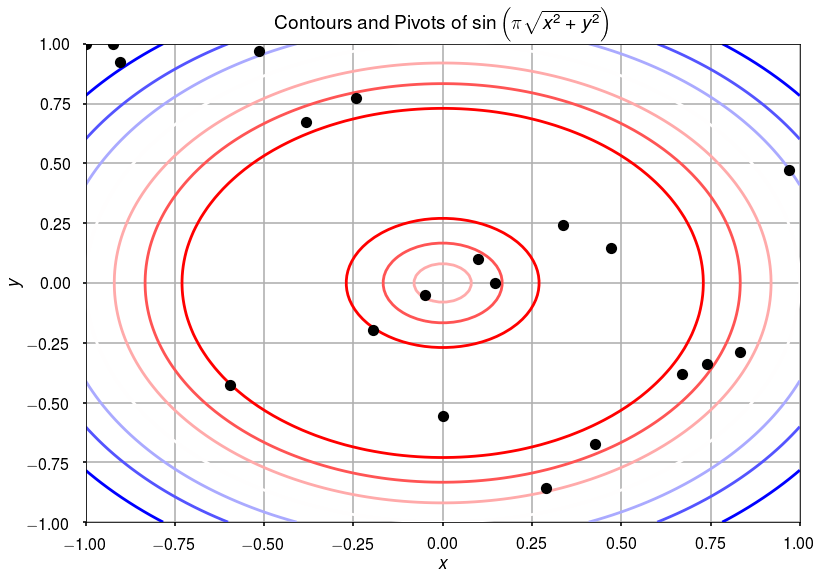

In [9]:
def f(x,y):
    r = np.sqrt(x**2+y**2)
    return np.sin(np.pi*r)
pivots = ct.ChebyshevExpansion2D.pivots_from_factory(64,64,f,-1,1,-1,1)
pivots_array = np.zeros((2,len(pivots)))
for i in range(len(pivots)):
    pivots_array[0,i] = pivots[i][0]
    pivots_array[1,i] = pivots[i][1]
colors=('r', 'b')
X, Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
plt.plot(pivots_array[0,:],pivots_array[1,:],'ok')
plt.contour(X,Y,f(X,Y),cmap="bwr")
plt.ylim([-1,1])
plt.xlim([-1,1])
plt.grid()
plt.ylabel(r"$y$")
plt.xlabel(r"$x$")
plt.title(r"Contours and Pivots of $\sin\left(\pi\sqrt{x^2+y^2}\right)$")
plt.savefig("sin_contours.pdf")


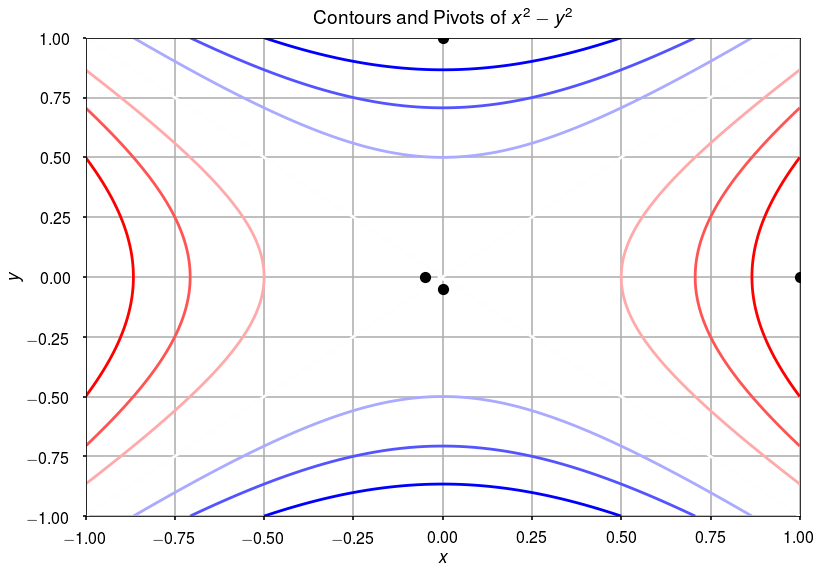

In [10]:
def f(x,y):
    return x**2-y**2
pivots = ct.ChebyshevExpansion2D.pivots_from_factory(64,64,f,-1,1,-1,1)
pivots_array = np.zeros((2,len(pivots)))
for i in range(len(pivots)):
    pivots_array[0,i] = pivots[i][0]
    pivots_array[1,i] = pivots[i][1]
plt.contour(X,Y,f(X,Y),cmap="bwr")
plt.plot(pivots_array[0,:],pivots_array[1,:],'ok')
plt.ylim([-1,1])
plt.xlim([-1,1])
plt.grid()
plt.ylabel(r"$y$")
plt.xlabel(r"$x$")
plt.title(r"Contours and Pivots of $x^2-y^2$")
plt.savefig("sin_contours.pdf")

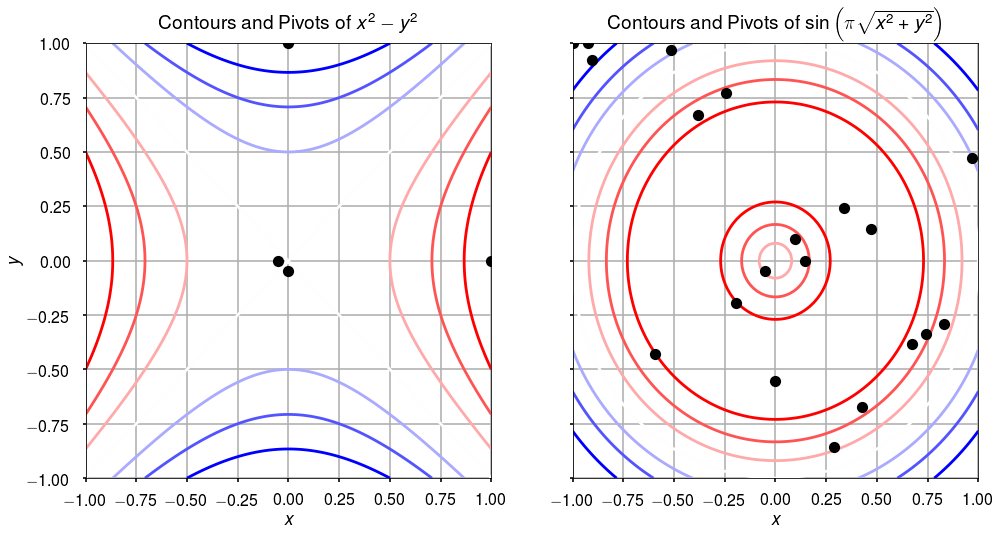

In [13]:
fig, axarr = plt.subplots(1,2,sharey=True,figsize=plt.figaspect(0.5))
def f(x,y):
    r = np.sqrt(x**2+y**2)
    return np.sin(np.pi*r)
pivots = ct.ChebyshevExpansion2D.pivots_from_factory(64,64,f,-1,1,-1,1)
pivots_array = np.zeros((2,len(pivots)))
for i in range(len(pivots)):
    pivots_array[0,i] = pivots[i][0]
    pivots_array[1,i] = pivots[i][1]
X, Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))
axarr[1].plot(pivots_array[0,:],pivots_array[1,:],'ok')
axarr[1].contour(X,Y,f(X,Y),cmap="bwr")
axarr[1].set_xlim([-1,1])
axarr[1].grid()
axarr[1].set_xlabel(r"$x$")
axarr[1].set_title(r"Contours and Pivots of $\sin\left(\pi\sqrt{x^2+y^2}\right)$")



def f(x,y):
    return x**2-y**2
pivots = ct.ChebyshevExpansion2D.pivots_from_factory(64,64,f,-1,1,-1,1)
pivots_array = np.zeros((2,len(pivots)))
for i in range(len(pivots)):
    pivots_array[0,i] = pivots[i][0]
    pivots_array[1,i] = pivots[i][1]
axarr[0].contour(X,Y,f(X,Y),cmap="bwr")
axarr[0].plot(pivots_array[0,:],pivots_array[1,:],'ok')
axarr[0].grid()
axarr[0].set_ylim([-1,1])
axarr[0].set_ylabel(r"$y$")
axarr[0].set_xlabel(r"$x$")
axarr[0].set_title(r"Contours and Pivots of $x^2-y^2$")
axarr[0].set_xlim([-1,1])
fig.savefig("contours_pivots.pdf")

In [60]:
def f(x,y):
    r = np.sqrt(x**2+y**2)
    return np.sin(np.pi*r)

In [61]:
%timeit chebf = ct.ChebyshevExpansion2D.factory(64,64,f,-1,1,-1,1)

673 ms ± 7.58 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [64]:
def f(x,y):
    return x**2-y**2

In [65]:
%timeit chebf = ct.ChebyshevExpansion2D.factory(64,64,f,-1,1,-1,1)

107 ms ± 79.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [19]:
chebf = ct.ChebyshevExpansion2D.factory(64,64,f,-1,1,-1,1)
xs = np.linspace(-1,1,100)
ys = np.linspace(-1,1,100)
X, Y = np.meshgrid(xs,ys)
error1 = np.zeros((100,100))
for i in range(len(xs)):
    for j in range(len(ys)):
        error1[i,j] = np.abs(chebf.z_Clenshaw(xs[i],ys[j])-f(xs[i],ys[j]))
        
def f(x,y):
    r = np.sqrt(x**2+y**2)
    return np.sin(np.pi*r)
chebf = ct.ChebyshevExpansion2D.factory(64,64,f,-1,1,-1,1)
error2 = np.zeros((100,100))
for i in range(len(xs)):
    for j in range(len(ys)):
        error2[i,j] = np.abs(chebf.z_Clenshaw(xs[i],ys[j])-f(xs[i],ys[j]))

In [21]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

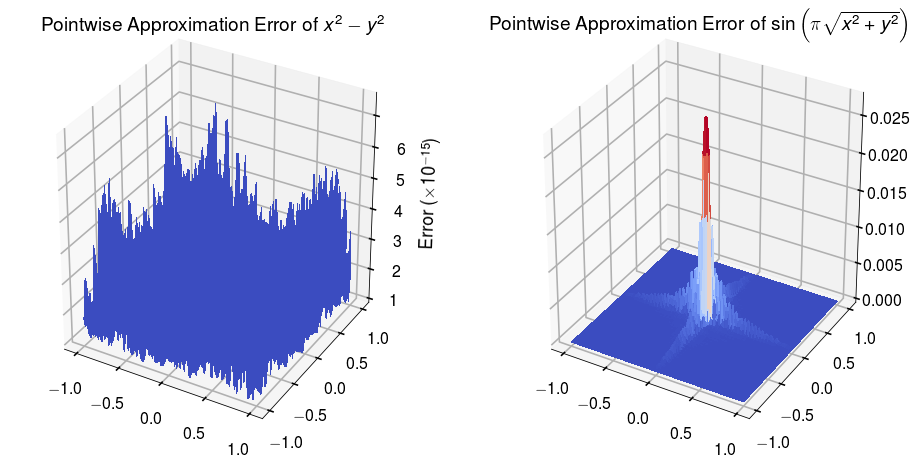

In [66]:

# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
ax.set_zticklabels([1,2,3,4,5,6])
ax.set_zlabel(r"Error $(\times10^{-15})$",labelpad=20)
ax.set_title(r"Pointwise Approximation Error of $x^2-y^2$")
ax.plot_surface(X, Y, error1, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,vmin=0,vmax=.025)
#ax.set_zlim3d(0,.025)

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title(r"Pointwise Approximation Error of $\sin\left(\pi\sqrt{x^2+y^2}\right)$")
#ax.set_zlim3d(0,.025)
ax.plot_surface(X, Y, error2, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,vmin=0,vmax=.025)
fig.savefig("pointwise_error_surface.pdf",bbox_inches='tight')